### Run this using the button or type githubtocolab.com in the url

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github.com/sdubnov/Free_Energy_experiments_v2/blob/main/simulation_colab.ipynb)



## Romain Brette's food vs. no food thought experiment: 
1. Does our neural network converge? 
2. What food policy does it converge to? 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!git clone https://github.com/sdubnov/Free_Energy_experiments_v2.git

Cloning into 'Free_Energy_experiments_v2'...
remote: Enumerating objects: 25, done.
remote: Counting objects: 100% (25/25), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 25 (delta 9), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (25/25), 48.68 KiB | 1.87 MiB/s, done.


In [5]:
%cd /content/Free_Energy_experiments_v2

/content/Free_Energy_experiments_v2


## Load the main classes and libraries: 

In [6]:
import matplotlib.pyplot as plt
import numpy as np

from free_energy_agent import free_agent
from train import train

## Run simulation: 

In [7]:
## define number of epochs:
epochs = 1000 
batch_size = 50

## define main parameters:
basic_needs = 3.0 ## average food consumption per day in order to maintain homeostatic conditions
success_probability = 0.2 ## the probability that looking for food(i.e. hunting) results in food(i.e. success)

loss, food_policies, total_consumption = train(epochs,batch_size,basic_needs,success_probability)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
food_policies

array([[0.62543148, 0.55778158, 0.44413552, 0.65930867, 0.4859288 ,
        0.42874309, 0.49824437, 0.54304326, 0.45253226, 0.49079433,
        0.55446428, 0.57325053, 0.54669803, 0.40833002, 0.60602856,
        0.4856824 , 0.5186342 , 0.35248846, 0.36111549, 0.39125612,
        0.28188115, 0.41917765, 0.52450496, 0.48590365],
       [0.92011929, 0.62425369, 0.38899571, 0.93652481, 0.47132701,
        0.41131207, 0.90090191, 0.56033063, 0.45790824, 0.55293131,
        0.58266532, 0.62787062, 0.51907027, 0.48441753, 0.62746388,
        0.44019014, 0.55891263, 0.47599274, 0.40591782, 0.37056211,
        0.35780093, 0.40429971, 0.60803473, 0.47222453],
       [0.96463329, 0.64827764, 0.36736789, 0.97132337, 0.45957208,
        0.40262479, 0.95861393, 0.56827497, 0.46168545, 0.57289052,
        0.58749616, 0.64630729, 0.51037896, 0.51328099, 0.63357753,
        0.42845958, 0.57647848, 0.52248025, 0.42231485, 0.36231196,
        0.38554522, 0.40441814, 0.63645399, 0.4686304 ],
       [0.978

## Inspect the loss to check convergence: 

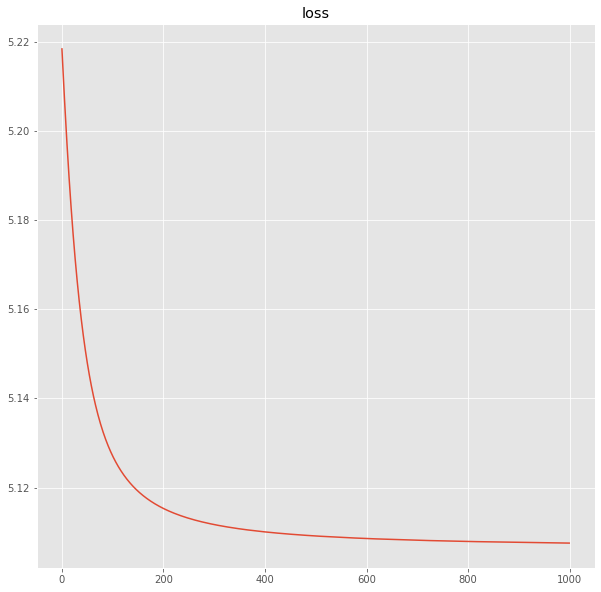

In [10]:
%matplotlib inline

plt.figure(figsize=(10,10))

plt.plot(loss)

plt.style.use('ggplot')

plt.title('loss')

plt.show()

## What food strategy does the agent converge to?

In [11]:
food_policies[-1]

array([0.99491894, 0.69220972, 0.32777792, 0.99556923, 0.42832083,
       0.38360032, 0.99441481, 0.58977675, 0.4711805 , 0.61146045,
       0.5893383 , 0.68033487, 0.49156311, 0.57017672, 0.64243269,
       0.41493979, 0.61219281, 0.61129546, 0.45319313, 0.3451038 ,
       0.44178545, 0.41277966, 0.685561  , 0.46305385])

In [46]:
def hunt():
  return np.random.choice((0.0,1.0),size=24,p=(1-success_probability,success_probability))
print(hunt())

[0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0.]


In [31]:
#help(np.random.choice)

In [50]:
np.mean([np.dot(food_policies[-1],hunt()) for i in range(100)])

2.7162390133738517

### Note that the discovered food policy differs significantly from Romain's expectation that the agent would choose to not look for food in order to minimise surprisal. In fact, our simple agent manages to get three meals per day on average. 